# Analysis of the results

In [1]:
import sys
sys.path.append("..")

from analysis.analysis_utils import extract_all_info_from_hdf5, get_phenotype_table_from_parameters
from analysis.dataset import Dataset
from analysis.link_measure import compute_mean_xhis
from plot.dataset_plot import plot_hist_by_phenotype
from plot.plot import plot_xhi_by_phenotype
import matplotlib.pyplot as plt
import numpy as np

/home/yuxuama/Dev/Python/reinforcing_learning_social/notebook/../plot/plot.py:66: SyntaxWarning: invalid escape sequence '\e'
  ax[selector].plot(t_norm, model(t_norm, popt[0]), color="tab:orange", label="Fit ($\eta$ = {})".format(round(popt[0], 2)))


In [2]:
filepath = r"../out/last/E3O2P21R12T17_S75_T0.7_M1000_N500000.h5"
adj_matrices, parameters = extract_all_info_from_hdf5(filepath)
niter = parameters["Number of interaction"]
phenotype_table = get_phenotype_table_from_parameters(parameters)

In [3]:
local_dt = Dataset('local')
local_dt.init_with_matrices(adj_matrices, parameters, niter)

/home/yuxuama/Dev/Python/reinforcing_learning_social/notebook/../analysis/link_measure.py:80: RuntimeWarning: invalid value encountered in divide
  xhi = histogram / L


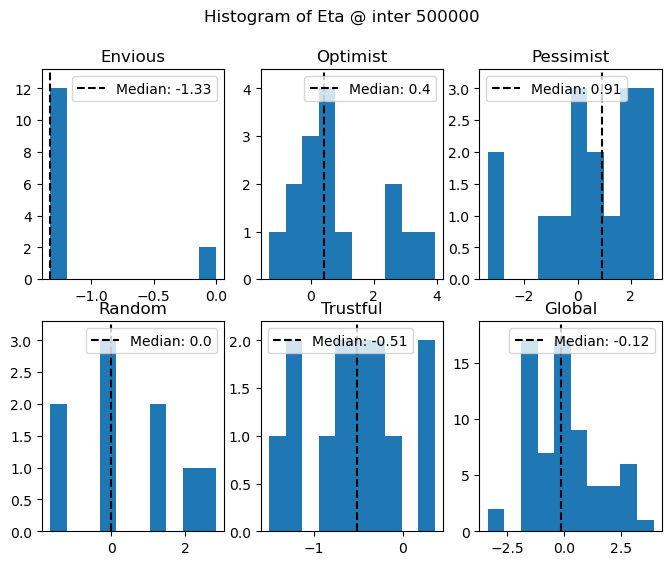

In [4]:
plot_hist_by_phenotype(local_dt, 'Eta')
plt.show()

{'Global': array([0.14604024, 0.17380574, 0.22241071, 0.25288109, 0.47036036,
       0.5191666 , 0.590868  , 0.65641718, 0.72087426, 0.89333333]), 'Envious': array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.92857143,
       0.92857143, 0.92857143, 0.92857143, 0.92857143, 1.        ]), 'Optimist': array([0.18075906, 0.19028287, 0.23139398, 0.27271266, 0.41176028,
       0.47144282, 0.55625356, 0.64032764, 0.72374644, 1.        ]), 'Pessimist': array([0.18296582, 0.20379915, 0.28351371, 0.33138303, 0.39847132,
       0.43952246, 0.56886273, 0.64927624, 0.77859172, 1.        ]), 'Random': array([0.25013228, 0.26865079, 0.35939153, 0.35939153, 0.37526455,
       0.49669312, 0.55132275, 0.66058201, 0.67645503, 1.        ]), 'Trustful': array([0.15869143, 0.26942647, 0.34147313, 0.41067226, 0.48828468,
       0.56640424, 0.68519906, 0.79174736, 0.89721619, 1.        ])}


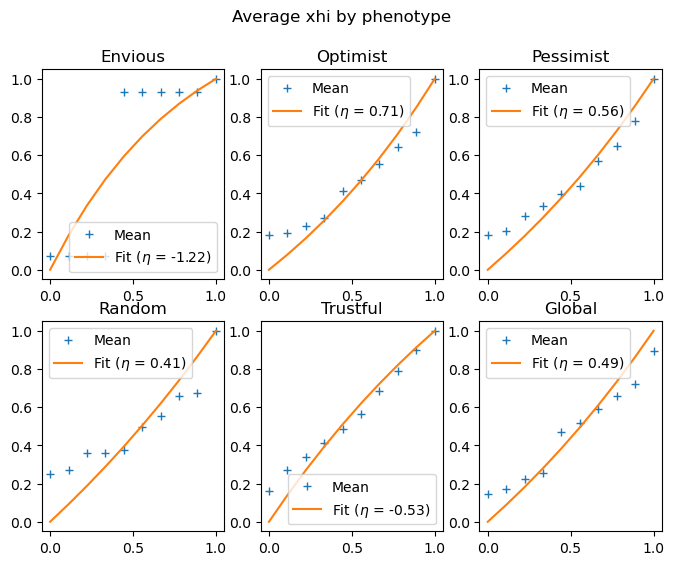

In [7]:
xhis = compute_mean_xhis(adj_matrices["peTotal"], parameters["Trust threshold"], phenotype_table)
print(xhis)
plot_xhi_by_phenotype(xhis)
plt.show()